### Import Libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Useful Functions

In [2]:
parent_directory = os.path.join(os.environ["BLACK_BOX"])
evals_path = os.path.join(parent_directory, "experiments/results/evaluation_statistics")
sys.path.append(parent_directory)

from experiments.utils.validation_utils import load_eval_from_csv

### Get Trained Agent Model Paths

In [3]:
# evaluation RL model folders located in ./experiments/results/evaluation_statistics folder
folder_name_1 = "evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0"
folder_name_2 = "evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1"
folder_name_3 = "evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2"
folder_name_4 = "evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3"
folder_name_5 = "evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123"

### Get All Files In the Directory

In [4]:
eval_directory_1 = os.path.join(evals_path, folder_name_1)
eval_directory_2 = os.path.join(evals_path, folder_name_2)
eval_directory_3 = os.path.join(evals_path, folder_name_3)
eval_directory_4 = os.path.join(evals_path, folder_name_4)
eval_directory_5 = os.path.join(evals_path, folder_name_5)

episode_evals_results_1 = [eval_directory_1 + "/" + f for f in os.listdir(eval_directory_1) if os.path.isfile(os.path.join(eval_directory_1, f))]
episode_evals_results_2 = [eval_directory_2 + "/" + f for f in os.listdir(eval_directory_2) if os.path.isfile(os.path.join(eval_directory_2, f))]
episode_evals_results_3 = [eval_directory_3 + "/" + f for f in os.listdir(eval_directory_3) if os.path.isfile(os.path.join(eval_directory_3, f))]
episode_evals_results_4 = [eval_directory_4 + "/" + f for f in os.listdir(eval_directory_4) if os.path.isfile(os.path.join(eval_directory_4, f))]
episode_evals_results_5 = [eval_directory_5 + "/" + f for f in os.listdir(eval_directory_5) if os.path.isfile(os.path.join(eval_directory_5, f))]

### Return All Statistics for Each Episode

In [5]:
def get_stats(episode_evals_results):
    full_eps_results = []
    eps_rewards = []
    n_collisions = []
    n_impossibles = []

    for eps_stat in episode_evals_results:

        stat_df = load_eval_from_csv(file_name=eps_stat)
        full_eps_results.append(stat_df)

        eps_avg_reward = stat_df["ego_rewards"].mean(skipna = True)
        eps_sum_reward = stat_df["ego_rewards"].sum(skipna = True)
        eps_rewards.append(eps_sum_reward)

        is_collision = stat_df["is_collision"].iloc[0]
        n_collisions.append(is_collision)

        is_impossible = stat_df["is_impossible"].iloc[0]
        n_impossibles.append(is_impossible)
    
    return full_eps_results, eps_rewards, n_collisions, n_impossibles

In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "full") / w

In [8]:
full_eps_results_1, eps_rewards_1, n_collisions_1, n_impossibles_1 = get_stats(episode_evals_results_1)
full_eps_results_2, eps_rewards_2, n_collisions_2, n_impossibles_2 = get_stats(episode_evals_results_2)
full_eps_results_3, eps_rewards_3, n_collisions_3, n_impossibles_3 = get_stats(episode_evals_results_3)
full_eps_results_4, eps_rewards_4, n_collisions_4, n_impossibles_4 = get_stats(episode_evals_results_4)
full_eps_results_5, eps_rewards_5, n_collisions_5, n_impossibles_5 = get_stats(episode_evals_results_5)


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_131.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_97.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_287.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_684.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_400.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_912.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_67.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_306.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_435.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_922.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_905.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_639.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_91.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_660.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_465.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_284.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_412.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_367.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_194.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_748.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_755.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_225.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_159.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_753.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_180.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_574.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_107.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_113.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_743.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_549.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_802.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_850.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-07_21-22-18mdgw9lf4_Agent0/eval_episode_888.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_854.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_747.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_419.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_418.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_669.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_518.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_701.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_636.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_511.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_735.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_307.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_906.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_296.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_998.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_834.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_737.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_977.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_374.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_467.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_291.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_708.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_542.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_18.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_635.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-1


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_240.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_308.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_217.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_908.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_805.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_645.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_897.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_633.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_19-34-16_a2cqydg_Agent1/eval_episode_726.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_88.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_229.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_260.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-1


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_330.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_533.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_8.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_694.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_460.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_575.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_354.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_84.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_604.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-1


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_197.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_603.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_178.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_471.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_340.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_874.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_967.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_820.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_224.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_376.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_502.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_920.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_316.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_199.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_26.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-1


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_984.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_802.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-19_23-31-04_y6fkw_8_Agent2/eval_episode_850.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_733.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_45.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_85.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_375.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_267.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_704.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_318.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_957.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_539.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_456.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_434.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_976.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_752.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_315.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_158.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_466.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_424.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_339.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_861.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_663.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_186.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_455.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_685.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_329.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_123.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_634.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_947.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_35.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_192.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_788.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-2


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-20_09-14-16_3_zp7wz_Agent3/eval_episode_314.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_131.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_97.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_202


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_671.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_122.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_482.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_120.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_110.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_839.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_23.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_699.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_519.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_665.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_683.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_135.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_545.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_336.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_360.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_616.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_127.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_124.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_154.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_711.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_744.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_139.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_125.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_600.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_498.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_495.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_58.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_


[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_810.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_943.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0_2022-08-08_09-45-04y_mw9iyt_Agent0123/eval_episode_601.csv

[INFO]-> Evaluation Stats are Loaded:	 /home/resul/Research/Codes/BlackBox/black-box-verification/experiments/results/evaluation_statistics/evaluation_PPOTrainer_highway_environment:highway-environment-v0

### Plot Results

In [9]:
y_values_1 = eps_rewards_1
y_values_2 = eps_rewards_2
y_values_3 = eps_rewards_3
y_values_4 = eps_rewards_4
y_values_5 = eps_rewards_5

x_values = list(range(1, len(y_values_1) + 1, 1))

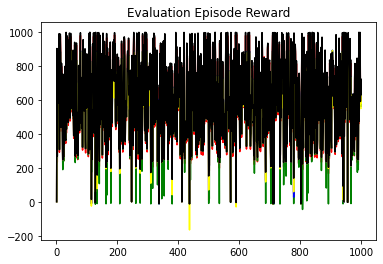

In [10]:
plt.title("Evaluation Episode Reward")

plt.plot(x_values, y_values_1, color="red")
plt.plot(x_values, y_values_2, color="green")
plt.plot(x_values, y_values_3, color="blue")
plt.plot(x_values, y_values_4, color="yellow")
plt.plot(x_values, y_values_5, color="black")

plt.show()

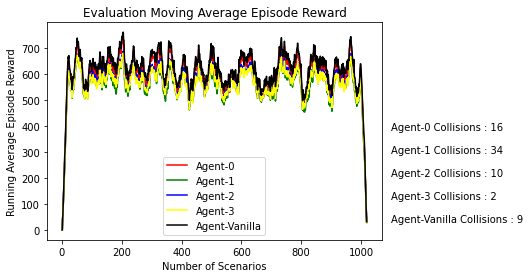

In [11]:
y_moving_avg_1 = moving_average(np.array(y_values_1), 20)
y_moving_avg_2 = moving_average(np.array(y_values_2), 20)
y_moving_avg_3 = moving_average(np.array(y_values_3), 20)
y_moving_avg_4 = moving_average(np.array(y_values_4), 20)
y_moving_avg_5 = moving_average(np.array(y_values_5), 20)

x_moving_values = list(range(1, len(y_moving_avg_1) + 1, 1))

plt.title("Evaluation Moving Average Episode Reward")
plt.plot(x_moving_values, y_moving_avg_1, color="red", label="Agent-0")
plt.plot(x_moving_values, y_moving_avg_2, color="green", label="Agent-1")
plt.plot(x_moving_values, y_moving_avg_3, color="blue", label="Agent-2")
plt.plot(x_moving_values, y_moving_avg_4, color="yellow", label="Agent-3")
plt.plot(x_moving_values, y_moving_avg_5, color="black", label="Agent-Vanilla")

text = "Agent-0 Collisions : " + str(n_collisions_1.count(True)) \
        + "\n\nAgent-1 Collisions : " + str(n_collisions_2.count(True)) \
        + "\n\nAgent-2 Collisions : " + str(n_collisions_3.count(True)) \
        + "\n\nAgent-3 Collisions : " + str(n_collisions_4.count(True)) \
        + "\n\nAgent-Vanilla Collisions : " + str(n_collisions_5.count(True))

plt.text(1100, 28, text)

plt.xlabel("Number of Scenarios")
plt.ylabel("Running Average Episode Reward")

plt.legend()

save_name = "running_reward"
plt.savefig(save_name + ".jpg", dpi=600, bbox_inches="tight")

plt.show()